#📌 Extracción

### Importando Bibilotecas

In [9]:
import  pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold,cross_validate, GridSearchCV
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,RocCurveDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.pipeline import Pipeline as imbpipeline




##Extracción del Archivo Tratado


In [10]:
archivo='https://raw.githubusercontent.com/jeandeguzman/Challenge-Telecom-X-parte-2/refs/heads/main/datos_tratados_vf.csv'


### Análisis previo de los datos

In [11]:
datos=pd.read_csv(archivo)
datos.head()

,customerID,Churn,Genero,Adulto_Mayor,Conyuge,Cargas,Meses_contrato,Servicio_telefonico,Multilineas,Servicio_internet,...,Proteccion_equipo,Soporte_tecnico,TVcable,Peliculas_online,Contrato,Factura_online,Metodo_pago,Factura_mensual,Total,Cuentas_diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,1,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.2
1,0003-MKNFE,0,Male,0,0,0,9,1,1,1,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.0
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,1,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.5
3,0011-IGKFF,1,Male,1,1,0,13,1,0,1,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.3
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,1,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.8


In [12]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customerID           7256 non-null   object 
 1   Churn                7256 non-null   int64  
 2   Genero               7256 non-null   object 
 3   Adulto_Mayor         7256 non-null   int64  
 4   Conyuge              7256 non-null   int64  
 5   Cargas               7256 non-null   int64  
 6   Meses_contrato       7256 non-null   int64  
 7   Servicio_telefonico  7256 non-null   int64  
 8   Multilineas          7256 non-null   int64  
 9   Servicio_internet    7256 non-null   int64  
 10  Seguridad_online     7256 non-null   int64  
 11  Respaldo_online      7256 non-null   int64  
 12  Proteccion_equipo    7256 non-null   int64  
 13  Soporte_tecnico      7256 non-null   int64  
 14  TVcable              7256 non-null   int64  
 15  Peliculas_online     7256 non-null   i

### OBS:
Después de la revisión de los datos podemos ver que existen datos numéricos y de texto que ya están revisados y ordenados pero aún tendremos que realizar algunas transformaciones para poder seguir con el análisis.


#🛠️ Preparación de los Datos

##Reemplazando datos

Para nuestra tabla de datos la columna Genero cumple la condición para pasar a binario ya que solo tiene dos estados

In [13]:
datos['Genero']=datos['Genero'].replace({'Female':0,'Male':1})

## Eliminación de Columnas Irrelevantes

Elimina columnas que no aportan valor al análisis o a los modelos predictivos, como identificadores únicos (por ejemplo, el ID del cliente). Estas columnas no ayudan en la predicción de la cancelación y pueden incluso perjudicar el desempeño de los modelos.

Para las demás columnas, se realizará el análisis de cada una de ellas, con distintas herramientas, para finalmente definir si se debe o no eliminar de la tabla y si su aporte a la respuesta final es o no relevante

In [14]:
datos=datos.drop('customerID',axis=1)
datos.head()

,Churn,Genero,Adulto_Mayor,Conyuge,Cargas,Meses_contrato,Servicio_telefonico,Multilineas,Servicio_internet,Seguridad_online,...,Proteccion_equipo,Soporte_tecnico,TVcable,Peliculas_online,Contrato,Factura_online,Metodo_pago,Factura_mensual,Total,Cuentas_diarias
0,0,0,0,1,1,9,1,0,1,0,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.2
1,0,1,0,0,0,9,1,1,1,0,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.0
2,1,1,0,0,0,4,1,0,1,0,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.5
3,1,1,1,1,0,13,1,0,1,0,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.3
4,1,0,1,1,0,3,1,0,1,0,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.8


##Codificando datos (Transformar todo a números)

Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como one-hot encoding.

El drop first se usa para no tener columnas redundantes para el análisis de colinealidad VIF

In [15]:
categoricas = ['Contrato','Metodo_pago']

#one_hot_enc = make_column_transformer((OneHotEncoder(handle_unknown='ignore'),categoricas),remainder='passthrough',sparse_threshold=0,force_int_remainder_cols=False)
one_hot_enc = make_column_transformer((OneHotEncoder(drop='first',handle_unknown='ignore'),categoricas),remainder='passthrough',sparse_threshold=0,force_int_remainder_cols=False)

datos = one_hot_enc.fit_transform(datos)
datos = pd.DataFrame(datos, columns=one_hot_enc.get_feature_names_out())
datos

,onehotencoder__Contrato_One year,onehotencoder__Contrato_Two year,onehotencoder__Metodo_pago_Credit card,onehotencoder__Metodo_pago_Electronic check,onehotencoder__Metodo_pago_Mailed check,remainder__Churn,remainder__Genero,remainder__Adulto_Mayor,remainder__Conyuge,remainder__Cargas,...,remainder__Seguridad_online,remainder__Respaldo_online,remainder__Proteccion_equipo,remainder__Soporte_tecnico,remainder__TVcable,remainder__Peliculas_online,remainder__Factura_online,remainder__Factura_mensual,remainder__Total,remainder__Cuentas_diarias
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,65.60,593.30,2.2
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,59.90,542.40,2.0
2,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,73.90,280.85,2.5
3,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,98.00,1237.85,3.3
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,83.90,267.40,2.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,55.15,742.90,1.8
7252,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,85.10,1873.70,2.8
7253,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,50.30,92.75,1.7
7254,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,67.85,4627.65,2.3


In [16]:
datos.columns

Index(['onehotencoder__Contrato_One year', 'onehotencoder__Contrato_Two year',
       'onehotencoder__Metodo_pago_Credit card',
       'onehotencoder__Metodo_pago_Electronic check',
       'onehotencoder__Metodo_pago_Mailed check', 'remainder__Churn',
       'remainder__Genero', 'remainder__Adulto_Mayor', 'remainder__Conyuge',
       'remainder__Cargas', 'remainder__Meses_contrato',
       'remainder__Servicio_telefonico', 'remainder__Multilineas',
       'remainder__Servicio_internet', 'remainder__Seguridad_online',
       'remainder__Respaldo_online', 'remainder__Proteccion_equipo',
       'remainder__Soporte_tecnico', 'remainder__TVcable',
       'remainder__Peliculas_online', 'remainder__Factura_online',
       'remainder__Factura_mensual', 'remainder__Total',
       'remainder__Cuentas_diarias'],
      dtype='object')

###Cambio de nombres de columnas

In [17]:
datos=datos.rename(columns={
       'onehotencoder__Contrato_One year':'Contrato 1 anno',
        'onehotencoder__Contrato_Two year':'Contrato 2 annos',
       'onehotencoder__Metodo_pago_Credit card':'Pago tarjeta credito',
       'onehotencoder__Metodo_pago_Electronic check':'Pago chequera electronica',
       'onehotencoder__Metodo_pago_Mailed check':'Pago cheque',
        'remainder__Churn':'Evasion',
       'remainder__Genero':'Genero',
        'remainder__Adulto_Mayor':'Adulto Mayor',
        'remainder__Conyuge':'Conyuge',
       'remainder__Cargas':'Cargas',
        'remainder__Meses_contrato':'Meses contrato',
        'remainder__Meses_antiguedad':'Meses antiguedad',
       'remainder__Servicio_telefonico':'Servicio telefonico',
       'remainder__Multilineas':'Multiples lineas',
        'remainder__Servicio_internet':'Internet',
        'remainder__Seguridad_online':'Seguridad online',
       'remainder__Respaldo_online':'Respaldo online',
        'remainder__Proteccion_equipo':'Proteccion equipo',
       'remainder__Soporte_tecnico':'Soporte_tecnico',
        'remainder__TVcable':'TVcable',
       'remainder__Peliculas_online':'Peliculas_online',
        'remainder__Factura_online':'Factura_online',
        'remainder__Factura_mensual':'Factura_mes',
       'remainder__Total':'Total',
       'remainder__Cuentas_diarias':'Cuentas diarias'})

datos.head()

#Eliminadas al usar drop=first
#'onehotencoder__Contrato_Month-to-month':'Contrato mes a mes','onehotencoder__Metodo_pago_Bank transfer':'Pago tranferencia',

,Contrato 1 anno,Contrato 2 annos,Pago tarjeta credito,Pago chequera electronica,Pago cheque,Evasion,Genero,Adulto Mayor,Conyuge,Cargas,...,Seguridad online,Respaldo online,Proteccion equipo,Soporte_tecnico,TVcable,Peliculas_online,Factura_online,Factura_mes,Total,Cuentas diarias
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,65.6,593.30,2.2
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,59.9,542.40,2.0
2,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,73.9,280.85,2.5
3,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,98.0,1237.85,3.3
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,83.9,267.40,2.8


## Separación de datos

Separamos nuestros datos para poder tener distintos conjuntos con los cuales se realizará un entrenemiento de modelos para al final elegir el mejor y con este último chequear como actua mi modelo con datos nunca antes vistos.

In [18]:

X=datos.drop('Evasion',axis=1)
y=datos['Evasion']

X_ent,X_test,y_ent,y_test=train_test_split(X,y,test_size=0.2,random_state=5,stratify=y)
X_train,X_val,y_train,y_val=train_test_split(X_ent,y_ent,test_size=0.1,random_state=5,stratify=y_ent)

print(f'Los datos totales son                   {datos.shape[0]}')
print(f'Los datos de X_ent son                      {X_ent.shape[0]}  = (train + val)')
print(f'Los datos de prueba son                 {X_test.shape[0]}')
print(f'Los datos de entrenamiento son   {X_train.shape[0]}')
print(f'Los datos de validación son      {X_val.shape[0]}')


Los datos totales son                   7256
Los datos de X_ent son                      5804  = (train + val)
Los datos de prueba son                 1452
Los datos de entrenamiento son   5223
Los datos de validación son      581


## Verificación de la Proporción de Cancelación (Evasion)

Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.

In [19]:
datos.Evasion.value_counts()


,count
Evasion,
0.0,5387
1.0,1869


In [20]:
datos.Evasion.value_counts(normalize=True)

,proportion
Evasion,
0.0,0.74242
1.0,0.25758


In [21]:
px.histogram(datos,x='Evasion',color='Evasion',barmode='group')

### OBS :
Se puede verificar que si existe un desbalance entre las clases. Más adelante usaremos las técnicas de balanceo de los datos

## Balanceo de Clases (datos de entrenamiento)

Si deseas profundizar en el análisis, aplica técnicas de balanceo como undersampling o oversampling. En situaciones de fuerte desbalanceo, herramientas como SMOTE pueden ser útiles para generar ejemplos sintéticos de la clase minoritaria.

El blanceo se efectua al conjunto de datos de entrenamiento

###Oversampling

In [22]:
oversample=SMOTE(random_state=5)
X_bal_over,y_bal_over=oversample.fit_resample(X_ent,y_ent)



In [23]:
y_bal_over.value_counts()

,count
Evasion,
0.0,4309
1.0,4309


###Undersampling

In [24]:
undersample=NearMiss(version=3)
X_bal_under,y_bal_under=undersample.fit_resample(X_ent,y_ent)



In [25]:
y_bal_under.value_counts()

,count
Evasion,
0.0,1495
1.0,1495


## Normalización o Estandarización

Evalúa la necesidad de normalizar o estandarizar los datos, según los modelos que se aplicarán (valores entre -1,0,1).
Modelos basados en distancia, como KNN, SVM, Regresión Logística y Redes Neuronales, requieren este preprocesamiento.
Por otro lado, modelos basados en árboles, como Decision Tree, Random Forest y XGBoost, no son sensibles a la escala de los datos.

In [26]:
datos.shape

(7256, 24)

In [27]:
columnas=datos.columns
columnas

Index(['Contrato 1 anno', 'Contrato 2 annos', 'Pago tarjeta credito',
       'Pago chequera electronica', 'Pago cheque', 'Evasion', 'Genero',
       'Adulto Mayor', 'Conyuge', 'Cargas', 'Meses contrato',
       'Servicio telefonico', 'Multiples lineas', 'Internet',
       'Seguridad online', 'Respaldo online', 'Proteccion equipo',
       'Soporte_tecnico', 'TVcable', 'Peliculas_online', 'Factura_online',
       'Factura_mes', 'Total', 'Cuentas diarias'],
      dtype='object')

In [28]:
normalizacion=MinMaxScaler()

datos_normalizado=normalizacion.fit_transform(datos)
datos_normalizado=pd.DataFrame(datos_normalizado,columns=columnas)
datos_normalizado


,Contrato 1 anno,Contrato 2 annos,Pago tarjeta credito,Pago chequera electronica,Pago cheque,Evasion,Genero,Adulto Mayor,Conyuge,Cargas,...,Seguridad online,Respaldo online,Proteccion equipo,Soporte_tecnico,TVcable,Peliculas_online,Factura_online,Factura_mes,Total,Cuentas diarias
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.471144,0.066294,0.470588
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.414428,0.060420,0.411765
2,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.553731,0.030239,0.558824
3,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.793532,0.140670,0.794118
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.653234,0.028687,0.647059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.367164,0.083556,0.352941
7252,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.665174,0.214043,0.647059
7253,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.318905,0.008533,0.323529
7254,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.493532,0.531831,0.500000


#🎯 Correlación y Selección de Variables

## Análisis de Correlación

Visualiza la matriz de correlación para identificar relaciones entre las variables numéricas. Presta especial atención a las variables que muestran una mayor correlación con la cancelación, ya que estas pueden ser fuertes candidatas para el modelo predictivo.

In [29]:
datos_corr=datos.corr().round(2)
datos_corr

,Contrato 1 anno,Contrato 2 annos,Pago tarjeta credito,Pago chequera electronica,Pago cheque,Evasion,Genero,Adulto Mayor,Conyuge,Cargas,...,Seguridad online,Respaldo online,Proteccion equipo,Soporte_tecnico,TVcable,Peliculas_online,Factura_online,Factura_mes,Total,Cuentas diarias
Contrato 1 anno,1.00,-0.29,0.07,-0.11,-0.00,-0.17,0.01,-0.05,0.08,0.07,...,0.10,0.09,0.10,0.10,0.06,0.07,-0.05,0.01,0.18,0.01
Contrato 2 annos,-0.29,1.00,0.17,-0.28,-0.01,-0.29,-0.01,-0.11,0.25,0.20,...,0.19,0.11,0.16,0.24,0.07,0.07,-0.15,-0.08,0.35,-0.08
Pago tarjeta credito,0.07,0.17,1.00,-0.37,-0.29,-0.13,0.00,-0.02,0.08,0.06,...,0.12,0.09,0.11,0.12,0.04,0.05,-0.01,0.03,0.18,0.03
Pago chequera electronica,-0.11,-0.28,-0.37,1.00,-0.39,0.29,0.00,0.17,-0.08,-0.15,...,-0.11,0.00,-0.00,-0.11,0.15,0.14,0.21,0.28,-0.06,0.27
Pago cheque,-0.00,-0.01,-0.29,-0.39,1.00,-0.09,0.01,-0.15,-0.10,0.06,...,-0.08,-0.17,-0.19,-0.09,-0.25,-0.25,-0.21,-0.38,-0.30,-0.38
Evasion,-0.17,-0.29,-0.13,0.29,-0.09,1.00,-0.01,0.15,-0.15,-0.16,...,-0.17,-0.08,-0.06,-0.16,0.06,0.06,0.19,0.19,-0.19,0.19
Genero,0.01,-0.01,0.00,0.00,0.01,-0.01,1.00,-0.00,-0.00,0.01,...,-0.02,-0.01,-0.00,-0.01,-0.01,-0.01,-0.01,-0.01,0.00,-0.01
Adulto Mayor,-0.05,-0.11,-0.02,0.17,-0.15,0.15,-0.00,1.00,0.02,-0.21,...,-0.04,0.07,0.06,-0.06,0.10,0.12,0.16,0.22,0.10,0.22
Conyuge,0.08,0.25,0.08,-0.08,-0.10,-0.15,-0.00,0.02,1.00,0.45,...,0.14,0.14,0.15,0.12,0.12,0.12,-0.01,0.10,0.32,0.10
Cargas,0.07,0.20,0.06,-0.15,0.06,-0.16,0.01,-0.21,0.45,1.00,...,0.08,0.02,0.01,0.06,-0.01,-0.04,-0.11,-0.11,0.06,-0.11


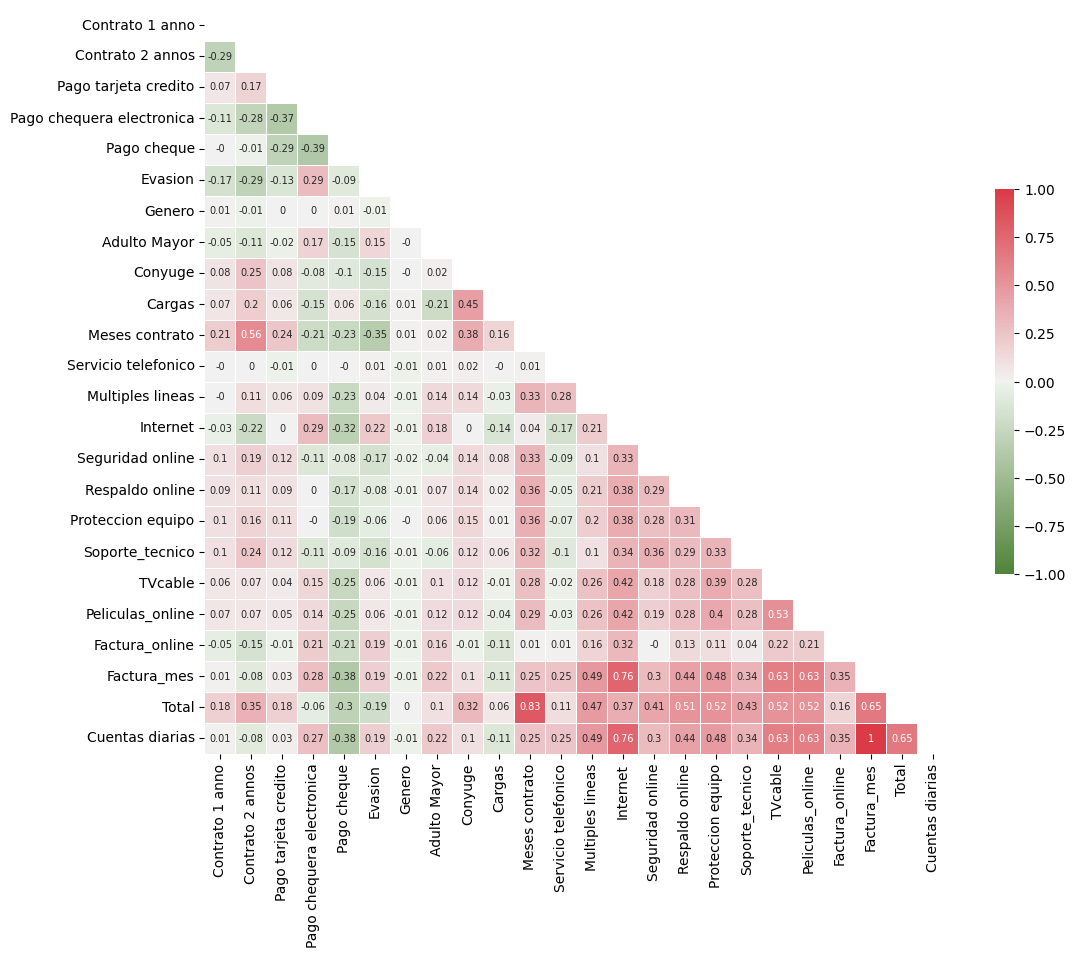

In [30]:
# ¿Qué factores están más correlacionados?

# Generar una máscara para el triángulo superior
mascara = np.zeros_like(datos_corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(12,10))

# Generar el mapa de calor (heatmap)
cmap = sns.diverging_palette(120, 10, as_cmap=True)

sns.heatmap(datos_corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, annot_kws={'size': 7},cbar_kws={"shrink": .5})

# Ajustar tamaño de las etiquetas de los ejes
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Mostrar el mapa de calor (heatmap)
plt.show()

In [31]:
#Correlación con la Evasión
datos_corr_evasion=datos.corr()['Evasion'].sort_values(ascending=False)
datos_corr_evasion

,Evasion
Evasion,1.000000
Pago chequera electronica,0.294181
Internet,0.223755
Factura_mes,0.189393
Cuentas diarias,0.188396
Factura_online,0.186309
Adulto Mayor,0.146400
TVcable,0.062456
Peliculas_online,0.060092
Multiples lineas,0.039277


In [32]:
#Correlación con la Evasión en valores absolutos
datos_corr_evasion=datos_corr_evasion.abs().sort_values(ascending=False)
datos_corr_evasion

,Evasion
Evasion,1.000000
Meses contrato,0.345799
Contrato 2 annos,0.294467
Pago chequera electronica,0.294181
Internet,0.223755
Total,0.194440
Factura_mes,0.189393
Cuentas diarias,0.188396
Factura_online,0.186309
Contrato 1 anno,0.174340


In [33]:
#Elije las columnas con correlación mayor al 15% considerando los valores absolutos
filtro=datos_corr_evasion[datos_corr_evasion.abs()>0.15]
#Elije las columnas con correlación menor al 15% para eliminarlas de DF
elimina=datos_corr_evasion[datos_corr_evasion.abs()<0.15]
datos_corr_evasion=filtro
datos_corr_evasion

,Evasion
Evasion,1.000000
Meses contrato,0.345799
Contrato 2 annos,0.294467
Pago chequera electronica,0.294181
Internet,0.223755
Total,0.194440
Factura_mes,0.189393
Cuentas diarias,0.188396
Factura_online,0.186309
Contrato 1 anno,0.174340


In [34]:
#Columnas que pueden ser eliminadas por tener una baja correlación con la varible dependiente 8Evasión)
elimina

,Evasion
Conyuge,0.148106
Adulto Mayor,0.146400
Pago tarjeta credito,0.131448
Pago cheque,0.089198
Respaldo online,0.080211
Proteccion equipo,0.063479
TVcable,0.062456
Peliculas_online,0.060092
Multiples lineas,0.039277
Servicio telefonico,0.012337


In [35]:
datos_corr_filtrado=datos.drop(elimina.index,axis=1)
datos_corr=datos_corr_filtrado
datos_corr


,Contrato 1 anno,Contrato 2 annos,Pago chequera electronica,Evasion,Cargas,Meses contrato,Internet,Seguridad online,Soporte_tecnico,Factura_online,Factura_mes,Total,Cuentas diarias
0,1.0,0.0,0.0,0.0,1.0,9.0,1.0,0.0,1.0,1.0,65.60,593.30,2.2
1,0.0,0.0,0.0,0.0,0.0,9.0,1.0,0.0,0.0,0.0,59.90,542.40,2.0
2,0.0,0.0,1.0,1.0,0.0,4.0,1.0,0.0,0.0,1.0,73.90,280.85,2.5
3,0.0,0.0,1.0,1.0,0.0,13.0,1.0,0.0,0.0,1.0,98.00,1237.85,3.3
4,0.0,0.0,0.0,1.0,0.0,3.0,1.0,0.0,1.0,1.0,83.90,267.40,2.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,1.0,0.0,0.0,0.0,0.0,13.0,1.0,1.0,1.0,0.0,55.15,742.90,1.8
7252,0.0,0.0,1.0,1.0,0.0,22.0,1.0,0.0,0.0,1.0,85.10,1873.70,2.8
7253,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,50.30,92.75,1.7
7254,0.0,1.0,0.0,0.0,1.0,67.0,1.0,1.0,1.0,0.0,67.85,4627.65,2.3


In [36]:
datos_corr_filtrado=datos_corr_filtrado.corr().round(2)
datos_corr_filtrado.shape

(13, 13)

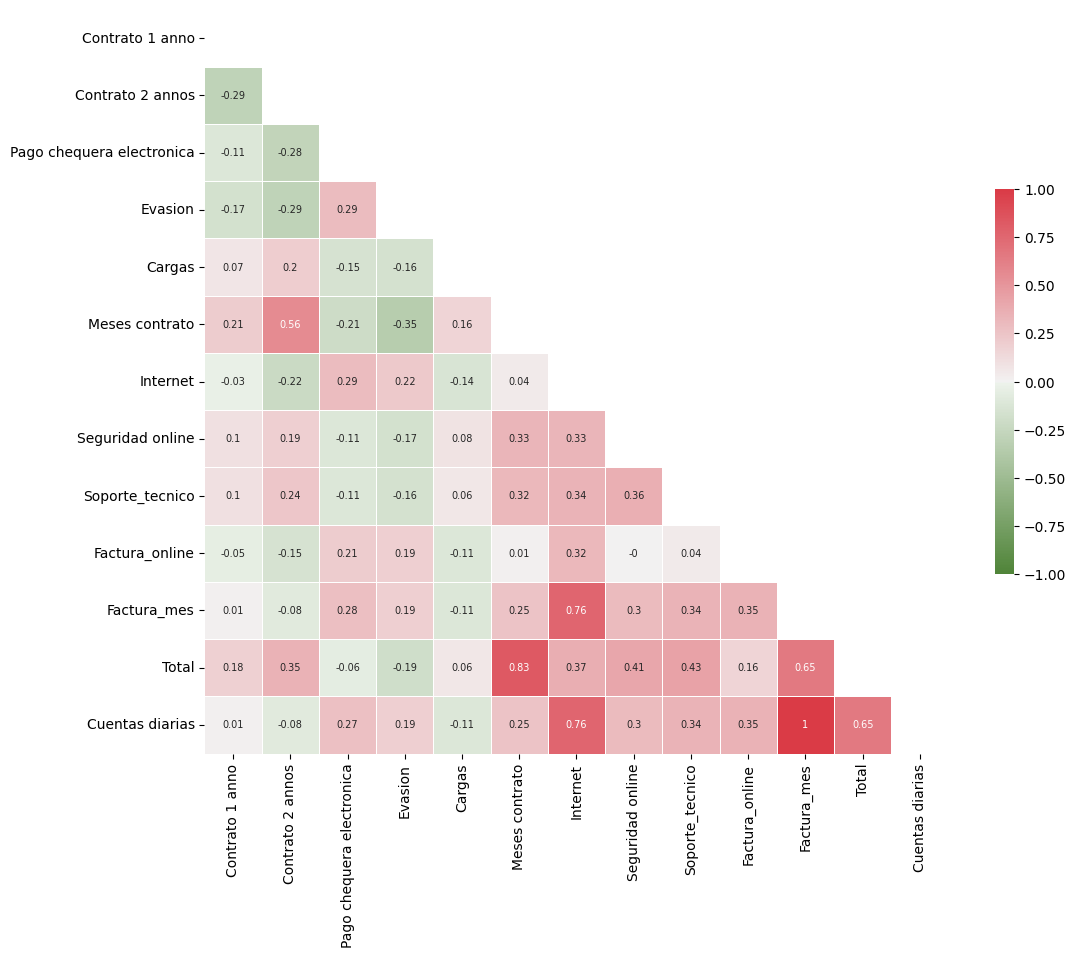

In [37]:
# Generar una máscara para el triángulo superior
mascara = np.zeros_like(datos_corr_filtrado, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(12,10))

# Generar el mapa de calor (heatmap)
cmap = sns.diverging_palette(120, 10, as_cmap=True)

sns.heatmap(datos_corr_filtrado, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, annot_kws={'size': 7},cbar_kws={"shrink": .5})

# Ajustar tamaño de las etiquetas de los ejes
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Mostrar el mapa de calor (heatmap)
plt.show()


##Análisis Dirigido

Investiga cómo variables específicas se relacionan con la cancelación, tales como:

Tiempo de contrato × Cancelación

Gasto total × Cancelación

In [38]:
datos[['Evasion','Meses contrato']].corr()

,Evasion,Meses contrato
Evasion,1.000000,-0.345799
Meses contrato,-0.345799,1.000000


In [39]:
px.box(datos,x='Meses contrato',color='Evasion')

In [40]:
datos[['Evasion','Total']].corr()

,Evasion,Total
Evasion,1.00000,-0.19444
Total,-0.19444,1.00000


In [41]:
px.box(datos,x='Total',color='Evasion')

##Análisis VIF  (multicolinealidad)

Se realizará el análisis de factor deinflación de la varianza sobre los datos normalizados.

*   Valores ok menores a 5
*   Valores aceptables entre 5 y 10
*   Valores descartables mayores a 10





In [42]:
X_norm=datos_normalizado.drop('Evasion',axis=1)
y_norm=datos_normalizado['Evasion']
X_const=add_constant(X_norm)
X_const

,const,Contrato 1 anno,Contrato 2 annos,Pago tarjeta credito,Pago chequera electronica,Pago cheque,Genero,Adulto Mayor,Conyuge,Cargas,...,Seguridad online,Respaldo online,Proteccion equipo,Soporte_tecnico,TVcable,Peliculas_online,Factura_online,Factura_mes,Total,Cuentas diarias
0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.471144,0.066294,0.470588
1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.414428,0.060420,0.411765
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.553731,0.030239,0.558824
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.793532,0.140670,0.794118
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.653234,0.028687,0.647059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.367164,0.083556,0.352941
7252,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.665174,0.214043,0.647059
7253,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.318905,0.008533,0.323529
7254,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.493532,0.531831,0.500000


In [43]:
columnas=X_const.columns
columnas

Index(['const', 'Contrato 1 anno', 'Contrato 2 annos', 'Pago tarjeta credito',
       'Pago chequera electronica', 'Pago cheque', 'Genero', 'Adulto Mayor',
       'Conyuge', 'Cargas', 'Meses contrato', 'Servicio telefonico',
       'Multiples lineas', 'Internet', 'Seguridad online', 'Respaldo online',
       'Proteccion equipo', 'Soporte_tecnico', 'TVcable', 'Peliculas_online',
       'Factura_online', 'Factura_mes', 'Total', 'Cuentas diarias'],
      dtype='object')

In [44]:
VIF1=pd.DataFrame()
VIF1['Variables']=columnas
VIF1['VIF']=[variance_inflation_factor(X_const[columnas],i) for i in range(len(columnas))]
VIF1.sort_values(by='VIF',ascending=False)

,Variables,VIF
21,Factura_mes,1178.144815
23,Cuentas diarias,1156.987860
0,const,45.032664
22,Total,10.839416
10,Meses contrato,7.585493
13,Internet,5.430134
2,Contrato 2 annos,2.650691
11,Servicio telefonico,2.392631
19,Peliculas_online,2.085056
18,TVcable,2.077513


In [45]:
columnas2=['const','Contrato 1 anno', 'Contrato 2 annos', 'Pago tarjeta credito',
       'Pago chequera electronica', 'Pago cheque', 'Genero', 'Adulto Mayor',
       'Conyuge', 'Cargas','Servicio telefonico','Internet',
       'Multiples lineas',  'Seguridad online', 'Respaldo online','Meses contrato',
       'Proteccion equipo', 'Soporte_tecnico', 'TVcable', 'Peliculas_online',
       'Factura_online',  'Total']
#Eliminadas
#'Factura_mes','Cuentas diarias',    Cuentas es irrelevante ya que fue creada de cuenta mensual. Factura mes se refleja en Total


In [46]:
VIF2=pd.DataFrame()
VIF2['Variables']=columnas2
VIF2['VIF']=[variance_inflation_factor(X_const[columnas2],i) for i in range(len(columnas2))]
VIF2.sort_values(by='VIF',ascending=False)

,Variables,VIF
0,const,38.592298
21,Total,9.038388
15,Meses contrato,6.972744
2,Contrato 2 annos,2.637988
11,Internet,2.608589
4,Pago chequera electronica,1.963770
5,Pago cheque,1.843386
19,Peliculas_online,1.737096
18,TVcable,1.724732
1,Contrato 1 anno,1.615216


In [47]:
datos_vif=pd.DataFrame()
for i in columnas2:
  if i in datos.columns:
    datos_vif[i]=datos[i]
datos_vif

,Contrato 1 anno,Contrato 2 annos,Pago tarjeta credito,Pago chequera electronica,Pago cheque,Genero,Adulto Mayor,Conyuge,Cargas,Servicio telefonico,...,Multiples lineas,Seguridad online,Respaldo online,Meses contrato,Proteccion equipo,Soporte_tecnico,TVcable,Peliculas_online,Factura_online,Total
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,1.0,9.0,0.0,1.0,1.0,0.0,1.0,593.30
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,9.0,0.0,0.0,0.0,1.0,0.0,542.40
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,280.85
3,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,13.0,1.0,0.0,1.0,1.0,1.0,1237.85
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,3.0,0.0,1.0,1.0,0.0,1.0,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,13.0,0.0,1.0,0.0,0.0,0.0,742.90
7252,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,22.0,0.0,0.0,0.0,1.0,1.0,1873.70
7253,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,92.75
7254,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,67.0,1.0,1.0,0.0,1.0,0.0,4627.65


##Resumen Preparación de Datos

Una vez hecho los diferentes análisis contamos con los datos modificados de la siguiente manera

- datos : datos iniciales

- X  : Dataframe con todas las columnas excepto la columna de Evasion (% del total)
- y  : Serie con la columna Evasión (% del total)
- X_ent, y_ent : datos de entrenamiento inicial
- X_test, y_test : datos de prueba
- X_train, y_train: datos de entrenamiento parcial
- X_val, y_val :datos de validación


- X_bal_over, y_bal_over : datos  balanceados con SMOTE
- X_bal_under, y_bal_under : datos balanceados con Nearmiss

- datos_normalizados : datos con la nomalización aplicada

- datos_corr :datos con análisis de correlación y eliminación de columnas con baja correlación

- datos_vif : datos con el análisi de VIF aplicado y eliminación de columnas que presentan alta colinealidad


Ahora se trabajará con los distintos conjuntos de datos para ver como van cambiando nuestros modelos de predicción.

#🤖 Modelado Predictivo

## Separación de Datos (originales, correlación, vif)

Divide el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento del modelo. Una división común es 70% para entrenamiento y 30% para prueba, o 80/20, dependiendo del tamaño de la base de datos.

Los datos fueron separados anteriormente en la etapara de balanceo

In [48]:
datos.shape

(7256, 24)

In [49]:
datos_corr.shape

(7256, 13)

In [50]:
datos_vif.shape

(7256, 21)

In [51]:
#Datos originales
X=datos.drop('Evasion',axis=1)
y=datos['Evasion']
X_ent,X_test,y_ent,y_test=train_test_split(X,y,test_size=0.2,random_state=5,stratify=y)
X_train,X_val,y_train,y_val=train_test_split(X_ent,y_ent,test_size=0.1,random_state=5,stratify=y_ent)

#Datos Correlacion
X_c=datos_corr.drop('Evasion',axis=1)
y_c=datos_corr['Evasion']
X_corr,X_test_corr,y_corr,y_test_corr=train_test_split(X_c,y_c,test_size=0.2,random_state=5,stratify=y_c)
X_train_corr,X_val_corr,y_train_corr,y_val_corr=train_test_split(X_corr,y_corr,test_size=0.1,random_state=5,stratify=y_corr)

##Datos VIF
X_v=datos_vif
y_v=datos['Evasion']
X_vif,X_test_vif,y_vif,y_test_vif=train_test_split(X_v,y_v,test_size=0.2,random_state=5,stratify=y_v)
X_train_vif,X_val_vif,y_train_vif,y_val_vif=train_test_split(X_vif,y_vif,test_size=0.1,random_state=5,stratify=y_vif)


#Datos Normalizados
X_n=datos_normalizado.drop('Evasion',axis=1)
y_n=datos_normalizado['Evasion']
X_norm,X_test_norm,y_norm,y_test_norm=train_test_split(X_n,y_n,test_size=0.2,random_state=5,stratify=y_n)
X_train_norm,X_val_norm,y_train_norm,y_val_norm=train_test_split(X_norm,y_norm,test_size=0.1,random_state=5,stratify=y_norm)

##Normalizacíon de datos (originales, correlación, VIF)

Llevar los datos a la misma escala

In [52]:
#Los datos fueron separados anteriormente en la etapara de balanceo

normalizacion=MinMaxScaler()
label_encoder = LabelEncoder()

#Datos originales
X_norm=normalizacion.fit_transform(X)
X_ent_norm=normalizacion.fit_transform(X_ent)
X_train_norm=normalizacion.fit_transform(X_train)
X_val_norm=normalizacion.fit_transform(X_val)
X_test_norm=normalizacion.transform(X_test)
y_norm = label_encoder.fit_transform(y)


#Datos con análisis de correlación
X_norm_corr=normalizacion.fit_transform(X_corr)
X_train_norm_corr=normalizacion.fit_transform(X_train_corr)
X_val_norm_corr=normalizacion.fit_transform(X_val_corr)
X_test_norm_corr=normalizacion.transform(X_test_corr)

#Datos con análisis de VIF
X_norm_vif=normalizacion.fit_transform(X_vif)
X_train_norm_vif=normalizacion.fit_transform(X_train_vif)
X_val_norm_vif=normalizacion.fit_transform(X_val_vif)
X_test_norm_vif=normalizacion.transform(X_test_vif)

##Creación de Modelos  (Análisis de precisión)

Crea al menos dos modelos diferentes para predecir la cancelación de clientes.

Un modelo puede requerir normalización, como Regresión Logística o KNN.

El otro modelo puede no requerir normalización, como Árbol de Decisión o Random Forest.

💡 La decisión de aplicar o no la normalización depende de los modelos seleccionados. Ambos modelos pueden ser creados sin normalización, pero también es una opción combinar modelos con y sin normalización.

Justificación:

Regresión Logística / KNN: Estos modelos son sensibles a la escala de los datos, por lo que la normalización es importante para que los coeficientes o las distancias se calculen correctamente.

Árbol de Decisión / Random Forest: Estos modelos no dependen de la escala de los datos, por lo que no es necesario aplicar normalización.

Si decides normalizar los datos, deberías explicar cómo esta etapa asegura que los modelos basados en distancia o en optimización de parámetros no se vean sesgados por la magnitud de las variables.



###Modelo de Arbol

In [53]:

modelo_arbol=DecisionTreeClassifier(max_depth=10,random_state=5)
modelo_arbol_corr=DecisionTreeClassifier(max_depth=10,random_state=5)
modelo_arbol_vif=DecisionTreeClassifier(max_depth=10,random_state=5)


####Precisión con datos originales

In [54]:
modelo_arbol.fit(X_train,y_train)
print(f'La exactitud del modelo de entrenamiento de Arbol es de: {modelo_arbol.score(X_train,y_train)*100:.2f}%')
print(f'La exactitud del modelo de validación de Arbol es de: {modelo_arbol.score(X_val,y_val)*100:.2f}%')

La exactitud del modelo de entrenamiento de Arbol es de: 87.15%
La exactitud del modelo de validación de Arbol es de: 76.76%


####Precisión con datos con análisis de correlación

In [55]:
modelo_arbol_corr.fit(X_train_corr,y_train_corr)
print(f'La exactitud del modelo de entrenamiento de Arbol es de: {modelo_arbol_corr.score(X_train_corr,y_train_corr)*100:.2f}%')
print(f'La exactitud del modelo de validación de Arbol es de: {modelo_arbol_corr.score(X_val_corr,y_val_corr)*100:.2f}%')

La exactitud del modelo de entrenamiento de Arbol es de: 87.25%
La exactitud del modelo de validación de Arbol es de: 75.39%


####Precisión con datos con aálisis de multicoleanidad (VIF)

In [56]:
modelo_arbol_vif.fit(X_train_vif,y_train_vif)
print(f'La exactitud del modelo de entrenamiento de Arbol es de: {modelo_arbol_vif.score(X_train_vif,y_train_vif)*100:.2f}%')
print(f'La exactitud del modelo de validación de Arbol es de: {modelo_arbol_vif.score(X_val_vif,y_val_vif)*100:.2f}%')

La exactitud del modelo de entrenamiento de Arbol es de: 86.39%
La exactitud del modelo de validación de Arbol es de: 76.59%


### Modelo Random Forest

In [57]:
modelo_random=RandomForestClassifier(max_depth = 10,random_state=5)
modelo_random_corr=RandomForestClassifier(max_depth = 10,random_state=5)
modelo_random_vif=RandomForestClassifier(max_depth = 10,random_state=5)


####Precisión con datos originales

In [58]:
modelo_random.fit(X_train,y_train)

print(f'La exactitud del modelo de entrenamiento Random Forest es de: {modelo_random.score(X_train,y_train)*100:.2f}%')
print(f'La exactitud del modelo de validación de Random Forest es de: {modelo_random.score(X_val,y_val)*100:.2f}%')

La exactitud del modelo de entrenamiento Random Forest es de: 87.23%
La exactitud del modelo de validación de Random Forest es de: 80.03%


####Precisión con datos con análisis de correlación

In [59]:
modelo_random_corr.fit(X_train_corr,y_train_corr)

print(f'La exactitud del modelo de entrenamiento Random Forest es de: {modelo_random_corr.score(X_train_corr,y_train_corr)*100:.2f}%')
print(f'La exactitud del modelo de validación de Random Forest es de: {modelo_random_corr.score(X_val_corr,y_val_corr)*100:.2f}%')

La exactitud del modelo de entrenamiento Random Forest es de: 86.96%
La exactitud del modelo de validación de Random Forest es de: 79.17%


####Precisión con datos con aálisis de multicoleanidad (VIF)

In [60]:
modelo_random_vif.fit(X_train_vif,y_train_vif)

print(f'La exactitud del modelo de entrenamiento Random Forest es de: {modelo_random_vif.score(X_train_vif,y_train_vif)*100:.2f}%')
print(f'La exactitud del modelo de validación de Random Forest es de: {modelo_random_vif.score(X_val_vif,y_val_vif)*100:.2f}%')

La exactitud del modelo de entrenamiento Random Forest es de: 86.79%
La exactitud del modelo de validación de Random Forest es de: 79.00%


### Modelo KNN

Para este modelo se debe utilizar los datos normailizados, ya que como opera con la distancias entre los puntos, todos los datos deben estar en la misma escala

In [61]:
modelo_knn=KNeighborsClassifier()
modelo_knn_corr=KNeighborsClassifier()
modelo_knn_vif=KNeighborsClassifier()

####Precisión con datos originales

In [62]:
modelo_knn.fit(X_train_norm,y_train)

print(f'La exactitud del modelo de entrenamiento KNN es de: {modelo_knn.score(X_train_norm,y_train)*100:.2f}%')
print(f'La exactitud del modelo de validación de KNN es de: {modelo_knn.score(X_val_norm,y_val)*100:.2f}%')

La exactitud del modelo de entrenamiento KNN es de: 83.09%
La exactitud del modelo de validación de KNN es de: 74.87%


####Precisión con datos con análisis de correlación

In [63]:
modelo_knn_corr.fit(X_train_norm_corr,y_train_corr)

print(f'La exactitud del modelo de entrenamiento KNN es de: {modelo_knn_corr.score(X_train_norm_corr,y_train_corr)*100:.2f}%')
print(f'La exactitud del modelo de validación de KNN es de: {modelo_knn_corr.score(X_val_norm_corr,y_val_corr)*100:.2f}%')

La exactitud del modelo de entrenamiento KNN es de: 84.86%
La exactitud del modelo de validación de KNN es de: 76.08%


####Precisión con datos con aálisis de multicoleanidad (VIF)

In [64]:
modelo_knn_vif.fit(X_train_norm_vif,y_train_vif)

print(f'La exactitud del modelo de entrenamiento KNN es de: {modelo_knn_vif.score(X_train_norm_vif,y_train_vif)*100:.2f}%')
print(f'La exactitud del modelo de validación de KNN es de: {modelo_knn_vif.score(X_val_norm_vif,y_val_vif)*100:.2f}%')

La exactitud del modelo de entrenamiento KNN es de: 83.27%
La exactitud del modelo de validación de KNN es de: 75.22%


## Evaluación de los Modelos (Analizando otras métricas)

Evalúa cada modelo utilizando las siguientes métricas:

*   Matriz de confusión
*   Exactitud (Acurácy)
*   Precisión
*   Recall
*   F1-score



Después, realiza un análisis crítico y compara los modelos:

¿Cuál modelo tuvo el mejor desempeño?

¿Algún modelo presentó overfitting o underfitting? Si es así, considera las posibles causas y ajustes:

Overfitting: Cuando el modelo aprende demasiado sobre los datos de entrenamiento, perdiendo la capacidad de generalizar a nuevos datos. Considera reducir la complejidad del modelo o aumentar los datos de entrenamiento.

Underfitting: Cuando el modelo no captura bien las tendencias de los datos, lo que indica que es demasiado simple. Intenta aumentar la complejidad del modelo o ajustar sus parámetros.

###Modelos

#### Modelos de Árbol

In [65]:
modelo_arbol.fit(X_train,y_train)
y_previsto_arbol=modelo_arbol.predict(X_val)

modelo_arbol_corr.fit(X_train_corr,y_train_corr)
y_previsto_arbol_corr=modelo_arbol_corr.predict(X_val_corr)

modelo_arbol_vif.fit(X_train_vif,y_train_vif)
y_previsto_arbol_vif=modelo_arbol_vif.predict(X_val_vif)

#### Modelos de Random forest

In [66]:
modelo_random.fit(X_train,y_train)
y_previsto_rf=modelo_random.predict(X_val)

modelo_random_corr.fit(X_train_corr,y_train_corr)
y_previsto_rf_corr=modelo_random_corr.predict(X_val_corr)

modelo_random_vif.fit(X_train_vif,y_train_vif)
y_previsto_rf_vif=modelo_random_vif.predict(X_val_vif)

#### Modelos de KNN

In [67]:
modelo_knn.fit(X_train,y_train)
y_previsto_knn=modelo_knn.predict(X_val)

modelo_knn_corr.fit(X_train_corr,y_train_corr)
y_previsto_knn_corr=modelo_knn_corr.predict(X_val_corr)

modelo_knn_vif.fit(X_train_vif,y_train_vif)
y_previsto_knn_vif=modelo_knn_vif.predict(X_val_vif)

###Matriz de confusión

####Modelo de Árbol

In [68]:
matriz_confusion=confusion_matrix(y_val,y_previsto_arbol)
matriz_confusion

array([[369,  62],
       [ 73,  77]])

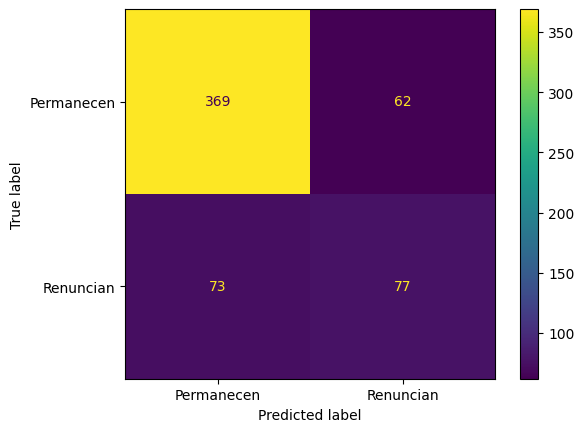

In [69]:
visualización=ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=['Permanecen','Renuncian'])
visualización.plot()

#### Modelo Random Forest

In [70]:
matriz_confusion=confusion_matrix(y_val,y_previsto_rf)
matriz_confusion

array([[388,  43],
       [ 73,  77]])

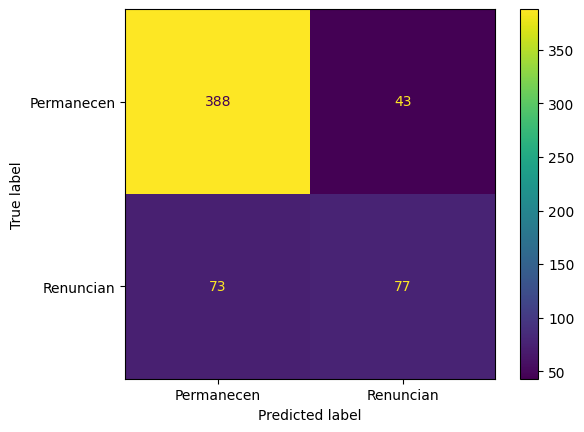

In [71]:
visualización=ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=['Permanecen','Renuncian'])
visualización.plot()

####Modelo KNN

In [72]:
matriz_confusion=confusion_matrix(y_val,y_previsto_knn)
matriz_confusion


array([[376,  55],
       [ 83,  67]])

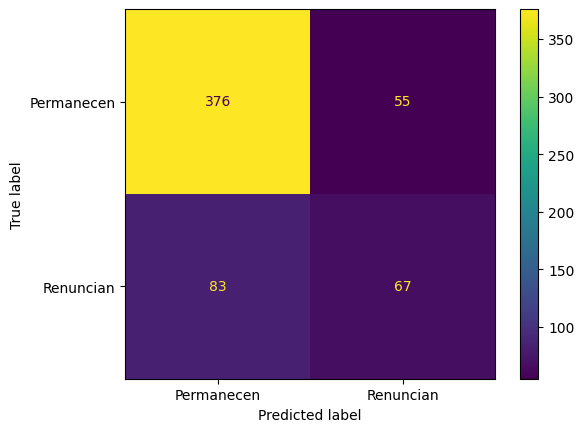

In [73]:
visualización=ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=['Permanecen','Renuncian'])
visualización.plot()

###Informe de Métricas

####Calculo por variable

In [74]:
def calcular_metricas(y_test,y_pred):

  metricas = {'accuracy':accuracy_score(y_test,y_pred),
              'recall':recall_score(y_test,y_pred),
              'precision':precision_score(y_test,y_pred),
               'f1':f1_score(y_test,y_pred)
                }
  return metricas

In [75]:
#Modelo de Arbol
calcular_metricas(y_val,y_previsto_arbol)

{'accuracy': 0.7676419965576592,
 'recall': 0.5133333333333333,
 'precision': 0.5539568345323741,
 'f1': 0.532871972318339}

In [76]:
#Modelo Random Forest
calcular_metricas(y_val,y_previsto_rf)

{'accuracy': 0.8003442340791739,
 'recall': 0.5133333333333333,
 'precision': 0.6416666666666667,
 'f1': 0.5703703703703704}

In [77]:
#Modelo KNN
calcular_metricas(y_val,y_previsto_knn)

{'accuracy': 0.7624784853700516,
 'recall': 0.44666666666666666,
 'precision': 0.5491803278688525,
 'f1': 0.49264705882352944}

####Calculo concentrado

In [78]:
#Modelo de Arbol
print('El informe de métricas para el modelo de Arbol es :')
print(classification_report(y_val,y_previsto_arbol))

El informe de métricas para el modelo de Arbol es :
              precision    recall  f1-score   support

         0.0       0.83      0.86      0.85       431
         1.0       0.55      0.51      0.53       150

    accuracy                           0.77       581
   macro avg       0.69      0.68      0.69       581
weighted avg       0.76      0.77      0.76       581



In [79]:
#Modelo Random Forest
print('El informe de métricas para el modelo Random Forest es :')
print(classification_report(y_val,y_previsto_rf))

El informe de métricas para el modelo Random Forest es :
              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87       431
         1.0       0.64      0.51      0.57       150

    accuracy                           0.80       581
   macro avg       0.74      0.71      0.72       581
weighted avg       0.79      0.80      0.79       581



In [80]:
#Modelo KNN
print('El informe de métricas para el modelo KNN es :')
print(classification_report(y_val,y_previsto_knn))

El informe de métricas para el modelo KNN es :
              precision    recall  f1-score   support

         0.0       0.82      0.87      0.84       431
         1.0       0.55      0.45      0.49       150

    accuracy                           0.76       581
   macro avg       0.68      0.66      0.67       581
weighted avg       0.75      0.76      0.75       581



### Curva ROC

#### Modelo de Arbol

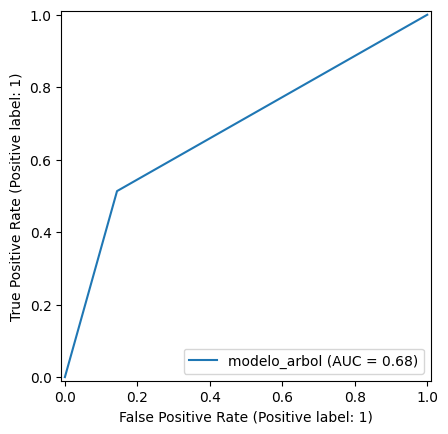

In [81]:
RocCurveDisplay.from_predictions(y_val,y_previsto_arbol,name='modelo_arbol');

####Modelo Random Forest

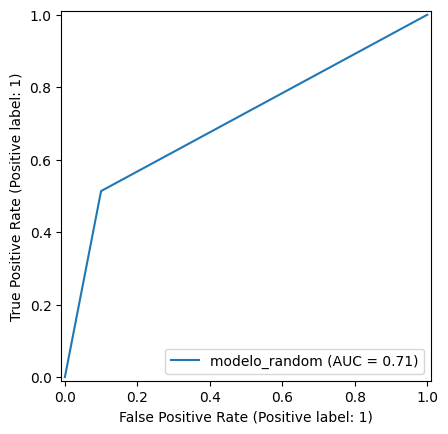

In [82]:
RocCurveDisplay.from_predictions(y_val,y_previsto_rf,name='modelo_random');

####Modelo KNN

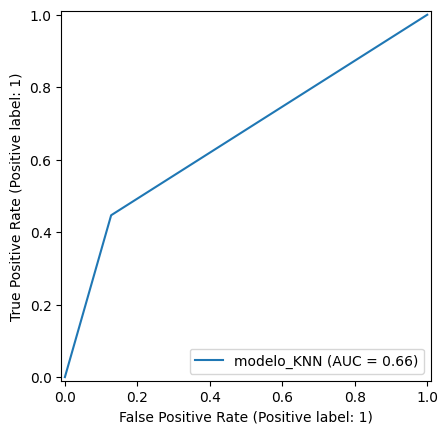

In [83]:
RocCurveDisplay.from_predictions(y_val,y_previsto_knn,name='modelo_KNN');

###Validación cruzada

Con estratificación para que cada división de datos sea representativa del total. Dividimos los datos de entrenamiento en 5 partes, obteniendo un valor de recall para cada parte y luego sacamos su promedio.

Luego nos enfocaremos en obtener el intervalos de confianza para el parámetro que nos insteresa que es el "recall"

In [84]:
def intervalo_confianza(resultado):
  promedio=resultado.mean()
  desv_standar=resultado.std()
  print(f'La media para el recall es: {(promedio*100).round(2)} %')
  print(f'El desvío estandar es: {(desv_standar*100).round(2)} %')
  print(f'El intervalo de confianza es de {promedio*100-2*desv_standar*100:.2f}% a {min(promedio*100+2*desv_standar*100,100):.2f}%')


#### Modelo de Árbol

In [85]:
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados_arbol = cross_validate(modelo_arbol, X_ent, y_ent, cv=skf, scoring = ['accuracy','recall', 'precision', 'f1'])
cv_resultados_arbol

{'fit_time': array([0.02768731, 0.02645612, 0.02664924, 0.02752376, 0.03420091]),
 'score_time': array([0.01050329, 0.01073408, 0.01157355, 0.0118773 , 0.01159072]),
 'test_accuracy': array([0.7786391 , 0.76658053, 0.76055125, 0.74849268, 0.75      ]),
 'test_recall': array([0.48829431, 0.48160535, 0.52173913, 0.50501672, 0.5083612 ]),
 'test_precision': array([0.584     , 0.55384615, 0.53608247, 0.51186441, 0.51525424]),
 'test_f1': array([0.53187614, 0.51520572, 0.52881356, 0.50841751, 0.51178451])}

In [86]:
intervalo_confianza(cv_resultados_arbol['test_recall'])

La media para el recall es: 50.1 %
El desvío estandar es: 1.44 %
El intervalo de confianza es de 47.22% a 52.98%


#### Modelo Random Forest

In [87]:
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados_random = cross_validate(modelo_random, X_ent, y_ent, cv=skf, scoring = ['accuracy','recall', 'precision', 'f1'])
cv_resultados_random


{'fit_time': array([0.58596969, 0.52321863, 0.54706144, 0.5861299 , 0.51351237]),
 'score_time': array([0.03105521, 0.03030157, 0.03080893, 0.0305953 , 0.03020597]),
 'test_accuracy': array([0.80964686, 0.8044789 , 0.79758829, 0.791559  , 0.80344828]),
 'test_recall': array([0.4916388 , 0.48160535, 0.47491639, 0.46153846, 0.53177258]),
 'test_precision': array([0.68055556, 0.66666667, 0.64545455, 0.63013699, 0.6437247 ]),
 'test_f1': array([0.57087379, 0.5592233 , 0.54720617, 0.53281853, 0.58241758])}

In [88]:
intervalo_confianza(cv_resultados_random['test_recall'])

La media para el recall es: 48.83 %
El desvío estandar es: 2.38 %
El intervalo de confianza es de 44.06% a 53.60%


#### Modelo KNN

In [89]:
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados_knn = cross_validate(modelo_knn, X_norm, y, cv=skf, scoring = ['accuracy','recall', 'precision', 'f1'])
cv_resultados_knn


{'fit_time': array([0.00248122, 0.00229955, 0.00212336, 0.00209188, 0.0019834 ]),
 'score_time': array([0.05711532, 0.05643415, 0.05622864, 0.05843353, 0.0619967 ]),
 'test_accuracy': array([0.76584022, 0.73880083, 0.7567195 , 0.75189524, 0.75396278]),
 'test_recall': array([0.4973262 , 0.47453083, 0.46791444, 0.48663102, 0.48395722]),
 'test_precision': array([0.55029586, 0.49166667, 0.53191489, 0.52      , 0.52463768]),
 'test_f1': array([0.52247191, 0.48294679, 0.49786629, 0.50276243, 0.50347705])}

In [90]:
intervalo_confianza(cv_resultados_knn['test_recall'])

La media para el recall es: 48.21 %
El desvío estandar es: 1.01 %
El intervalo de confianza es de 46.18% a 50.24%


### Validación cruzada con Balanceo de datos usando la pipeline

#### Modelo de Árbol

In [91]:
pipeline=imbpipeline(steps=[('oversampling',SMOTE(random_state=5)),('Arbol',modelo_arbol)]) #Recibe datos en lissta y dentro de estoen tuplas
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados_over = cross_validate(pipeline, X_ent, y_ent, cv=skf, scoring = ['accuracy','recall', 'precision', 'f1'])
cv_resultados_over


{'fit_time': array([0.06922317, 0.06565833, 0.06618094, 0.06502247, 0.06557274]),
 'score_time': array([0.01976728, 0.01362062, 0.01219964, 0.01231384, 0.01252627]),
 'test_accuracy': array([0.77605512, 0.74332472, 0.77347115, 0.74246339, 0.74051724]),
 'test_recall': array([0.66220736, 0.45150502, 0.57190635, 0.53177258, 0.59531773]),
 'test_precision': array([0.55462185, 0.50185874, 0.55882353, 0.5       , 0.4972067 ]),
 'test_f1': array([0.60365854, 0.47535211, 0.56528926, 0.51539708, 0.54185693])}

In [92]:
pipeline=imbpipeline(steps=[('undersampling',NearMiss(version=3)),('Arbol',modelo_arbol)]) #Recibe datos en lissta y dentro de estoen tuplas
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados_under = cross_validate(pipeline, X_ent, y_ent, cv=skf, scoring = ['accuracy','recall', 'precision', 'f1'])
cv_resultados_under


{'fit_time': array([0.06100512, 0.0593698 , 0.05928826, 0.06172895, 0.06506324]),
 'score_time': array([0.01145363, 0.0119493 , 0.01240396, 0.01139164, 0.01165366]),
 'test_accuracy': array([0.70628768, 0.67269595, 0.69853575, 0.67355728, 0.67758621]),
 'test_recall': array([0.68561873, 0.64214047, 0.68227425, 0.55852843, 0.68561873]),
 'test_precision': array([0.45353982, 0.41290323, 0.44444444, 0.40338164, 0.42268041]),
 'test_f1': array([0.54593875, 0.5026178 , 0.53825858, 0.4684432 , 0.52295918])}

In [93]:
intervalo_confianza(cv_resultados_over['test_recall'])

La media para el recall es: 56.25 %
El desvío estandar es: 6.98 %
El intervalo de confianza es de 42.29% a 70.22%


In [94]:
intervalo_confianza(cv_resultados_under['test_recall'])

La media para el recall es: 65.08 %
El desvío estandar es: 4.9 %
El intervalo de confianza es de 55.28% a 74.88%


####Modelo Random Forest

In [95]:
#modelo_random=RandomForestClassifier(max_depth = 7,random_state=5)
pipeline=imbpipeline(steps=[('oversampling',SMOTE(random_state=5)),('random forest',modelo_random)]) #Recibe datos en lissta y dentro de estoen tuplas
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados_over = cross_validate(pipeline, X_ent, y_ent, cv=skf, scoring = ['accuracy','recall', 'precision', 'f1'])
cv_resultados_over


{'fit_time': array([0.91790199, 1.99325824, 2.02393246, 4.07610989, 1.74611902]),
 'score_time': array([0.05011034, 0.06549478, 0.3190732 , 0.27234888, 0.0655365 ]),
 'test_accuracy': array([0.80534022, 0.791559  , 0.80620155, 0.77347115, 0.78189655]),
 'test_recall': array([0.62207358, 0.60200669, 0.63210702, 0.57190635, 0.62541806]),
 'test_precision': array([0.62207358, 0.59405941, 0.62171053, 0.55882353, 0.57012195]),
 'test_f1': array([0.62207358, 0.59800664, 0.62686567, 0.56528926, 0.59649123])}

In [96]:
pipeline=imbpipeline(steps=[('undersampling',NearMiss(version=3)),('random forest',modelo_random)]) #Recibe datos en lissta y dentro de estoen tuplas
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados_under = cross_validate(pipeline, X_ent, y_ent, cv=skf, scoring = ['accuracy','recall', 'precision', 'f1'])
cv_resultados_under


{'fit_time': array([1.01310611, 1.02449465, 0.45643854, 0.42090011, 0.40004897]),
 'score_time': array([0.05471563, 0.07149625, 0.03405166, 0.03109264, 0.03111196]),
 'test_accuracy': array([0.7751938 , 0.76830319, 0.75968992, 0.73815676, 0.73793103]),
 'test_recall': array([0.66889632, 0.66555184, 0.69230769, 0.63545151, 0.6722408 ]),
 'test_precision': array([0.55248619, 0.54076087, 0.52538071, 0.49350649, 0.49385749]),
 'test_f1': array([0.60514372, 0.59670165, 0.5974026 , 0.55555556, 0.5694051 ])}

In [97]:
intervalo_confianza(cv_resultados_over['test_recall'])

La media para el recall es: 61.07 %
El desvío estandar es: 2.18 %
El intervalo de confianza es de 56.70% a 65.44%


In [98]:
intervalo_confianza(cv_resultados_under['test_recall'])

La media para el recall es: 66.69 %
El desvío estandar es: 1.83 %
El intervalo de confianza es de 63.04% a 70.34%


####Model KNN

In [99]:
pipeline=imbpipeline(steps=[('oversampling',SMOTE(random_state=5)),('KNN',modelo_knn)]) #Recibe datos en lissta y dentro de estoen tuplas
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados_over = cross_validate(pipeline, X_norm, y, cv=skf, scoring = ['accuracy','recall', 'precision', 'f1'])
cv_resultados_over


{'fit_time': array([0.02182293, 0.02419472, 0.02293682, 0.02086449, 0.02130508]),
 'score_time': array([0.0973413 , 0.08408999, 0.08005595, 0.0823493 , 0.08204031]),
 'test_accuracy': array([0.70867769, 0.69882839, 0.68642316, 0.678153  , 0.66988284]),
 'test_recall': array([0.74331551, 0.6997319 , 0.6684492 , 0.69518717, 0.72727273]),
 'test_precision': array([0.45950413, 0.44539249, 0.4302926 , 0.42414356, 0.41910632]),
 'test_f1': array([0.56792646, 0.544317  , 0.52356021, 0.52684904, 0.53176931])}

In [100]:
pipeline=imbpipeline(steps=[('undersampling',NearMiss(version=3)),('KNN',modelo_knn)]) #Recibe datos en lissta y dentro de estoen tuplas
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados_under = cross_validate(pipeline, X_norm, y, cv=skf, scoring = ['accuracy','recall', 'precision', 'f1'])
cv_resultados_under

{'fit_time': array([0.06181169, 0.06031251, 0.06108999, 0.06898618, 0.06002545]),
 'score_time': array([0.03852296, 0.03732324, 0.03831673, 0.05040908, 0.03776193]),
 'test_accuracy': array([0.684573  , 0.66161268, 0.68711234, 0.678153  , 0.68435562]),
 'test_recall': array([0.62032086, 0.61126005, 0.61229947, 0.62299465, 0.63101604]),
 'test_precision': array([0.42335766, 0.39721254, 0.42565056, 0.41681574, 0.42446043]),
 'test_f1': array([0.5032538 , 0.48152059, 0.50219298, 0.49946409, 0.50752688])}

In [101]:
intervalo_confianza(cv_resultados_over['test_recall'])

La media para el recall es: 70.68 %
El desvío estandar es: 2.61 %
El intervalo de confianza es de 65.46% a 75.90%


In [102]:
intervalo_confianza(cv_resultados_under['test_recall'])

La media para el recall es: 61.96 %
El desvío estandar es: 0.73 %
El intervalo de confianza es de 60.50% a 63.41%


##Resumen

###Modelos sin balanceo de datos

In [103]:
resultados=pd.DataFrame(index=['accuracy','recall', 'precision', 'f1'])
modelos={'modelo_arbol':[y_previsto_arbol,y_val], 'modelo_arbol_corr':[y_previsto_arbol_corr,y_val_corr],'modelo_arbol_vif':[y_previsto_arbol_vif,y_val_vif],
         'modelo_random':[y_previsto_rf,y_val], 'modelo_random_corr':[y_previsto_rf_corr,y_val_corr],'modelo_random_vif':[y_previsto_rf_vif,y_val_vif],
         'modelo_knn':[y_previsto_knn,y_val], 'modelo_knn_corr':[y_previsto_knn_corr,y_val_corr],'modelo_knn_vif':[y_previsto_knn_vif,y_val_vif]
         }

for m, v in modelos.items():
  #modelo_arbol.fit(X_train,y_train)
  #y_previsto_arbol=modelo_arbol.predict(X_val)
  metricas = calcular_metricas(v[1],v[0])
  resultados[m] = list(metricas.values())

resultados=resultados.T
resultados.sort_values(by='recall',ascending=False)



,accuracy,recall,precision,f1
modelo_arbol,0.767642,0.513333,0.553957,0.532872
modelo_arbol_corr,0.753873,0.513333,0.523810,0.518519
modelo_random,0.800344,0.513333,0.641667,0.570370
modelo_random_corr,0.791738,0.513333,0.616000,0.560000
modelo_random_vif,0.790017,0.493333,0.616667,0.548148
modelo_knn_vif,0.765921,0.466667,0.555556,0.507246
modelo_arbol_vif,0.765921,0.453333,0.557377,0.500000
modelo_knn,0.762478,0.446667,0.549180,0.492647
modelo_knn_corr,0.759036,0.446667,0.540323,0.489051


####OBS:

De los datos obtenidos podemos observar que los 2 modelos que entregan los valores más altos de "accuracy (exactitud)" y "recall" son:

1.   modelo_arbol
2.   modelo_arbol_corr
3.   modelo_random   (mejor modelo)






###Modelos con balanceo de datos

In [104]:
from ctypes import c_char
df_resultados=pd.DataFrame(index=['accuracy','recall', 'precision', 'f1'])

#modelo_arbol.fit(X_ent, y_ent)
#y_previsto_arbol=modelo_arbol.predict(X_val)

modelos_over={'modelo_arbol_over':[modelo_arbol,X_ent, y_ent],
              'modelo_arbol_over_corr':[modelo_arbol_corr,X_corr, y_corr],
              'modelo_arbol_vif':[modelo_arbol_vif,X_vif, y_vif],
              'modelo_random_over':[modelo_random,X_ent, y_ent],
              'modelo_random_over_corr':[modelo_random_corr,X_corr, y_corr],
              'modelo_random_over_vif':[modelo_random_vif,X_vif, y_vif],
              'modelo_knn_over':[modelo_knn,X_norm, y],
              'modelo_knn_over_corr':[modelo_knn_corr,X_norm_corr, y_corr],
              'modelo_knn_over_vif':[modelo_knn_vif,X_norm_vif, y_vif]

         }
modelos_under={'modelo_arbol_under':[modelo_arbol,X_ent, y_ent],
              'modelo_arbol_under_corr':[modelo_arbol_corr,X_corr, y_corr],
              'modelo_arbol_vif':[modelo_arbol_vif,X_vif, y_vif],
              'modelo_random_under':[modelo_random,X_ent, y_ent],
              'modelo_random_under_corr':[modelo_random_corr,X_corr, y_corr],
              'modelo_random_under_vif':[modelo_random_vif,X_vif, y_vif],
              'modelo_knn_under':[modelo_knn,X_norm, y],
              'modelo_knn_under_corr':[modelo_knn_corr,X_norm_corr, y_corr],
              'modelo_knn_under_vif':[modelo_knn_vif,X_norm_vif, y_vif]
         }

def promedios(resultados):
  prom_accuracy=resultados['test_accuracy'].mean()
  prom_recall=resultados['test_recall'].mean()
  prom_precision=resultados['test_precision'].mean()
  prom_f1=resultados['test_f1'].mean()
  return {'accuracy':prom_accuracy,'recall':prom_recall,'precision':prom_precision,'f1':prom_f1}

for m, v in modelos_over.items():
  #print(v[0])
  pipeline=imbpipeline(steps=[('oversampling',SMOTE(random_state=5)),('Modelo',v[0])]) #Recibe datos en lissta y dentro de estoen tuplas
  skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
  cv_resultados_over = cross_validate(pipeline, v[1], v[2], cv=skf, scoring = ['accuracy','recall', 'precision', 'f1'])
#cv_resultados_over
  df_resultados[m] = list(promedios(cv_resultados_over).values())

for m, v in modelos_under.items():
  #print(v[0])
  pipeline=imbpipeline(steps=[('undersampling',NearMiss(version=3)),('Modelo',v[0])]) #Recibe datos en lissta y dentro de estoen tuplas
  skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
  cv_resultados_under = cross_validate(pipeline, v[1], v[2], cv=skf, scoring = ['accuracy','recall', 'precision', 'f1'])
  df_resultados[m]=list(promedios(cv_resultados_under).values())



df_resultados=df_resultados.T
df_resultados['prom acc-recall']=df_resultados[['accuracy','recall']].mean(axis=1)
df_resultados['prom total']=df_resultados.mean(axis=1)
df_resultados.sort_values(by='recall',ascending=False)


,accuracy,recall,precision,f1,prom acc-recall,prom total
modelo_knn_over,0.688393,0.706791,0.435688,0.538884,0.697592,0.613470
modelo_knn_over_vif,0.677463,0.698328,0.423477,0.527138,0.687895,0.602860
modelo_knn_over_corr,0.726567,0.679599,0.478741,0.561405,0.703083,0.629879
modelo_random_under_vif,0.745347,0.674916,0.504577,0.577304,0.710132,0.642455
modelo_random_under,0.755855,0.666890,0.521198,0.584842,0.711372,0.648031
modelo_arbol_vif,0.686078,0.662876,0.429399,0.520895,0.674477,0.594745
modelo_random_under_corr,0.749997,0.660870,0.511999,0.576668,0.705433,0.640993
modelo_arbol_under,0.685733,0.650836,0.427390,0.515644,0.668284,0.589577
modelo_arbol_under_corr,0.700206,0.639465,0.444396,0.523598,0.669836,0.595500
modelo_knn_under,0.679161,0.619578,0.417499,0.498792,0.649370,0.572880


####OBS:

Del análisis de los datos balanceados podemos observar que los modelos KNN  entregan los valores más altos para el "recall".

Sin embargo, para la elección del modelo se considerará el promedio entre el "accuracy (exactitud)" y el "recall", considerando que los porcentajes están bastante cercanos unos con otros. De acuerdo a esto tomaremos como mejor modelo el

1.   modelo_random_under_vif


###¿Cuál modelo tuvo el mejor desempeño?

Considerando El mejor modelo fue el de random forest con el pipeline de datos balanceados con undersample para los datos filtrados de acuerdo al análisis VIF


###¿Algún modelo presentó overfitting o underfitting?

No se distingue modelos con overfitting o underfitting. La diferencia entre el análisis de los datos de entrenamiento y los datos de validación está como máximo entre el 10% y 11%

##Análisis de Champion (validación)

Como mejor módelo será elegido el de Random forest para los datos filtrados con el análisis VIF y balanceados con el metodo undersample para el cual haremos el análisi completo con el mejor resuaatdo de datos obtenidos


In [105]:
#Balanceo de datos VIF
undersample=NearMiss(version=3)
X_vif_bal_under,y_vif_bal_under=undersample.fit_resample(X_vif,y_vif)
X_train_vif_bal_under,y_train_vif_bal_under=undersample.fit_resample(X_train_vif,y_train_vif)
X_test_vif_bal_under,y_test_vif_bal_under=undersample.fit_resample(X_test_vif,y_test_vif)
X_val_vif_bal_under,y_val_vif_bal_under=undersample.fit_resample(X_val_vif,y_val_vif)

#Aplicando modelo RandomForest
modelo_champion=RandomForestClassifier(max_depth = 10,random_state=5)
modelo_champion.fit(X_train_vif_bal_under,y_train_vif_bal_under)
y_previsto_ch=modelo_champion.predict(X_test_vif_bal_under)
#Obteniendo las métricas
metricas_ch=calcular_metricas(y_test_vif_bal_under,y_previsto_ch)
metricas_ch

{'accuracy': 0.7459893048128342,
 'recall': 0.6497326203208557,
 'precision': 0.804635761589404,
 'f1': 0.7189349112426036}

              precision    recall  f1-score   support

         0.0       0.71      0.84      0.77       374
         1.0       0.80      0.65      0.72       374

    accuracy                           0.75       748
   macro avg       0.76      0.75      0.74       748
weighted avg       0.76      0.75      0.74       748



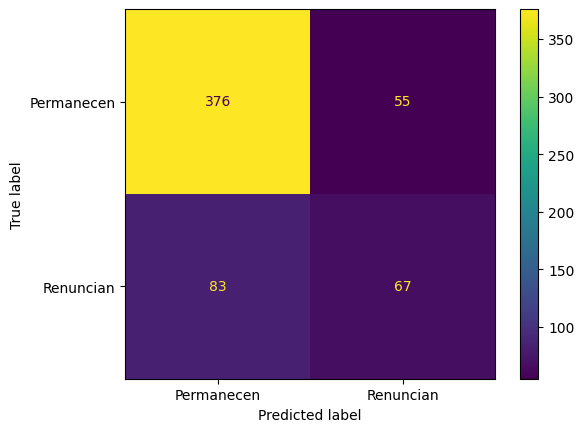

In [106]:
#matriz de confusion
matriz_confusion=confusion_matrix(y_test_vif_bal_under,y_previsto_ch)
visualizacion=ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=['Permanecen','Renuncian'])
visualización.plot()
print(classification_report(y_test_vif_bal_under,y_previsto_ch))




In [107]:
#Modelo Random Forest con datos filtrados de acuerdo al análisis de vif
modelo_champion=RandomForestClassifier(max_depth = 10,random_state=5)
modelo_champion.fit(X_train_vif_bal_under,y_train_vif_bal_under)

print(f'La exactitud del modelo de entrenamiento Random Forest es de: {modelo_champion.score(X_train_vif_bal_under,y_train_vif_bal_under)*100:.2f}%')
print(f'La exactitud del modelo de validación de Random Forest es de: {modelo_champion.score(X_test_vif_bal_under,y_test_vif_bal_under)*100:.2f}%')

La exactitud del modelo de entrenamiento Random Forest es de: 88.07%
La exactitud del modelo de validación de Random Forest es de: 74.60%


In [108]:
pipeline=imbpipeline(steps=[('undersampling',NearMiss(version=3)),('random forest',modelo_champion)]) #Recibe datos en lissta y dentro de estoen tuplas
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados_under_ch = cross_validate(pipeline, X_vif, y_vif, cv=skf, scoring = ['accuracy','recall', 'precision', 'f1'])
cv_resultados_under_ch

{'fit_time': array([0.36745095, 0.35873389, 0.36027527, 0.38082814, 0.36010814]),
 'score_time': array([0.04700661, 0.03255343, 0.0318594 , 0.03217483, 0.03213215]),
 'test_accuracy': array([0.75193798, 0.75538329, 0.75366064, 0.72782084, 0.73793103]),
 'test_recall': array([0.66555184, 0.66555184, 0.7090301 , 0.66220736, 0.6722408 ]),
 'test_precision': array([0.51421189, 0.51958225, 0.51581509, 0.47941889, 0.49385749]),
 'test_f1': array([0.58017493, 0.58357771, 0.5971831 , 0.55617978, 0.5694051 ])}

In [109]:
intervalo_confianza(cv_resultados_under_ch['test_recall'])

La media para el recall es: 67.49 %
El desvío estandar es: 1.74 %
El intervalo de confianza es de 64.02% a 70.96%


#📋 Interpretación y Conclusiones

Habiendo cargado los datos de los archivos limpios obtenidos de la etapa anterior "Telecom_X", se procede a ejecutar el análisis de los datos con distintos modelos para el modelado predictivo.

Se debe tener en cuenta que estamos tratando de obtener un modelo que explique la Evasión de los clientes, para lo cual nuestra métrica a mejorar es la de "recall", de tal manera de tener la mayor certeza respecto al pronóstco de la evasión.

El análisis se realizó de los siguientes conjuntos de datos:

*   Se mantine conjunto de datos iniciales (datos)
*   Se obtiene conjunto de datos post un análisis de correlación (datos_corr)
*   Se obtiene conjunto de datos post un análisis de VIF (datos_vif)

Luego se realiza análisis de los conjuntos anteriores para los modelos:

*   Árbol
*   Random Forest
*   KNN

Además se aplica balanceo de datos a cada conjunto de datos y se vuelve a analizar para cada modelo.

Finalmente al realizar la compración de las distintas métricas para los modelos, se eligió como el mejor modelo al modelo "random_under_vif", es decir, los datos del conjunto datos_vif, con balanceo undersample y aplicando el modelo Random Forest, siendo este nuestro modelo_champion

Con nuestro modelo champion se finaliza chequeando el modelo con nuestros datos de prueba "X_test"

Resultados
*   modelo_random_under_vif	-- accuracy: 0.745347	 **recall: 0.674916**
*   modelo_champion --------------- accuracy: 0.745989  **recall: 0.649732**

La exactitud del modelo de validación de Random Forest es de: 74.60%
El intervalo de confianza es de 64.02% a 70.96%


De acuerdo al análisi de correlación de los datos, las variables que más inciden en la Evasión son:

* Meses contrato: Mientras mas tiempo en la compañía, existen menor riesgo de que renuncien. Esto se ve mayormente potenciado por los clientes que tienen contratos de 1 año en adelante.
* Pago chequera electronica y Factura_online: Las personas con estos medios de pago tienen mayor probalidad de permaneceer en la compañía.

En conclusión, se recomienda buscar las instancias comerciales para generar contratos a largo plazo con los clientes y por otro lado fortalecer el pago automático de las cuentas, incentivando al cliente a elegir estas opciones y eliminando otras opciones que son menos atractivas.









##Profundizando en el modelo champion

###Análisis de la Importancia de las Variables del Champion

In [110]:
datos_vif.columns

Index(['Contrato 1 anno', 'Contrato 2 annos', 'Pago tarjeta credito',
       'Pago chequera electronica', 'Pago cheque', 'Genero', 'Adulto Mayor',
       'Conyuge', 'Cargas', 'Servicio telefonico', 'Internet',
       'Multiples lineas', 'Seguridad online', 'Respaldo online',
       'Meses contrato', 'Proteccion equipo', 'Soporte_tecnico', 'TVcable',
       'Peliculas_online', 'Factura_online', 'Total'],
      dtype='object')

In [111]:
len(datos_vif.columns)

21

In [112]:
#Importancai de variables en modelo random forest elegido  (Solo valores de X)
importancia_ch=modelo_champion.feature_importances_
importancia_ch

array([0.04453257, 0.04299058, 0.01481709, 0.041436  , 0.01526454,
       0.02222434, 0.02048886, 0.02204988, 0.02287791, 0.01275726,
       0.00754859, 0.02022077, 0.05053149, 0.02297961, 0.2852929 ,
       0.01813631, 0.05143801, 0.02153222, 0.02037011, 0.03257302,
       0.20993794])

In [113]:
importancia_ch=pd.DataFrame({'Variables explicativas':X_vif.columns,'Importancia':(importancia_ch*100).round(2)}).sort_values(by='Importancia',ascending=False)
importancia_ch

,Variables explicativas,Importancia
14,Meses contrato,28.53
20,Total,20.99
16,Soporte_tecnico,5.14
12,Seguridad online,5.05
0,Contrato 1 anno,4.45
1,Contrato 2 annos,4.30
3,Pago chequera electronica,4.14
19,Factura_online,3.26
13,Respaldo online,2.30
8,Cargas,2.29


In [114]:
len(importancia_ch)

21

###Cantidad de features necesarios

In [115]:
#Creo DF con solo sus indices
resultados_ch=pd.DataFrame(index=['accuracy','recall', 'precision', 'f1'])
#Modelo a utilizar
modelo_champion_var=RandomForestClassifier(max_depth = 10,random_state=5)
ct_features=[i if i!=0 else 1 for i in range(0,22,3)]

#Recorro cada columna en saltos de 5
#Toma 5 columnas y hace todo el análisis con el modelo y entrega los valores de RMSE, MAE y R2. Luego agrega 5 columnas mas y repite el análisis
for i in ct_features:
  selected_features = importancia_ch['Variables explicativas'].values[:i]
  X_train_sel = X_vif_bal_under[selected_features]
  X_test_sel = X_test_vif_bal_under[selected_features]
  modelo_champion_var.fit(X_train_sel, y_vif_bal_under)
  y_pred = modelo_champion_var.predict(X_test_sel)
  metricas = calcular_metricas(y_test_vif_bal_under,y_pred)
  resultados_ch[i] = list(metricas.values())

resultados_ch

,1,3,6,9,12,15,18,21
accuracy,0.696524,0.719251,0.716578,0.717914,0.724599,0.736631,0.743316,0.735294
recall,0.489305,0.558824,0.668449,0.639037,0.652406,0.652406,0.649733,0.641711
precision,0.835616,0.822835,0.739645,0.758730,0.762500,0.784566,0.799342,0.789474
f1,0.617201,0.665605,0.702247,0.693759,0.703170,0.712409,0.716814,0.707965


In [116]:
#Creo DF con solo sus indices
resultados_ch=pd.DataFrame(index=['accuracy','recall', 'precision', 'f1'])
#Modelo a utilizar
modelo_champion_var=RandomForestClassifier(max_depth = 10,random_state=5)
ct_features=[i if i!=0 else 1 for i in range(12,16,1)]

#Recorro cada columna en saltos de 5
#Toma 5 columnas y hace todo el análisis con el modelo y entrega los valores de RMSE, MAE y R2. Luego agrega 5 columnas mas y repite el análisis
for i in ct_features:
  selected_features = importancia_ch['Variables explicativas'].values[:i]
  X_train_sel = X_vif_bal_under[selected_features]
  X_test_sel = X_test_vif_bal_under[selected_features]
  modelo_champion_var.fit(X_train_sel, y_vif_bal_under)
  y_pred = modelo_champion_var.predict(X_test_sel)
  metricas = calcular_metricas(y_test_vif_bal_under,y_pred)
  resultados_ch[i] = list(metricas.values())

resultados_ch

,12,13,14,15
accuracy,0.724599,0.731283,0.735294,0.736631
recall,0.652406,0.636364,0.652406,0.652406
precision,0.762500,0.785479,0.782051,0.784566
f1,0.703170,0.703102,0.711370,0.712409


###Selección de variables

Considerando solo el análisis del recall y el accuracy, se dejan 14 variables como parte del modelo.


In [117]:
#Df final quedaría con las siguientes columnas
selected_features = importancia_ch['Variables explicativas'].values[:14]
X_selected_feautures=X[selected_features]
X_selected_feautures

,Meses contrato,Total,Soporte_tecnico,Seguridad online,Contrato 1 anno,Contrato 2 annos,Pago chequera electronica,Factura_online,Respaldo online,Cargas,Genero,Conyuge,TVcable,Adulto Mayor
0,9.0,593.30,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0
1,9.0,542.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,4.0,280.85,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,13.0,1237.85,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
4,3.0,267.40,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,13.0,742.90,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7252,22.0,1873.70,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
7253,2.0,92.75,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
7254,67.0,4627.65,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0


In [118]:
X_selected_feautures.columns

Index(['Meses contrato', 'Total', 'Soporte_tecnico', 'Seguridad online',
       'Contrato 1 anno', 'Contrato 2 annos', 'Pago chequera electronica',
       'Factura_online', 'Respaldo online', 'Cargas', 'Genero', 'Conyuge',
       'TVcable', 'Adulto Mayor'],
      dtype='object')

In [119]:
datos_ch=X_selected_feautures.copy()
datos_ch['Evasion']=y
datos_ch



,Meses contrato,Total,Soporte_tecnico,Seguridad online,Contrato 1 anno,Contrato 2 annos,Pago chequera electronica,Factura_online,Respaldo online,Cargas,Genero,Conyuge,TVcable,Adulto Mayor,Evasion
0,9.0,593.30,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
1,9.0,542.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,4.0,280.85,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,13.0,1237.85,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
4,3.0,267.40,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,13.0,742.90,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7252,22.0,1873.70,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
7253,2.0,92.75,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
7254,67.0,4627.65,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0


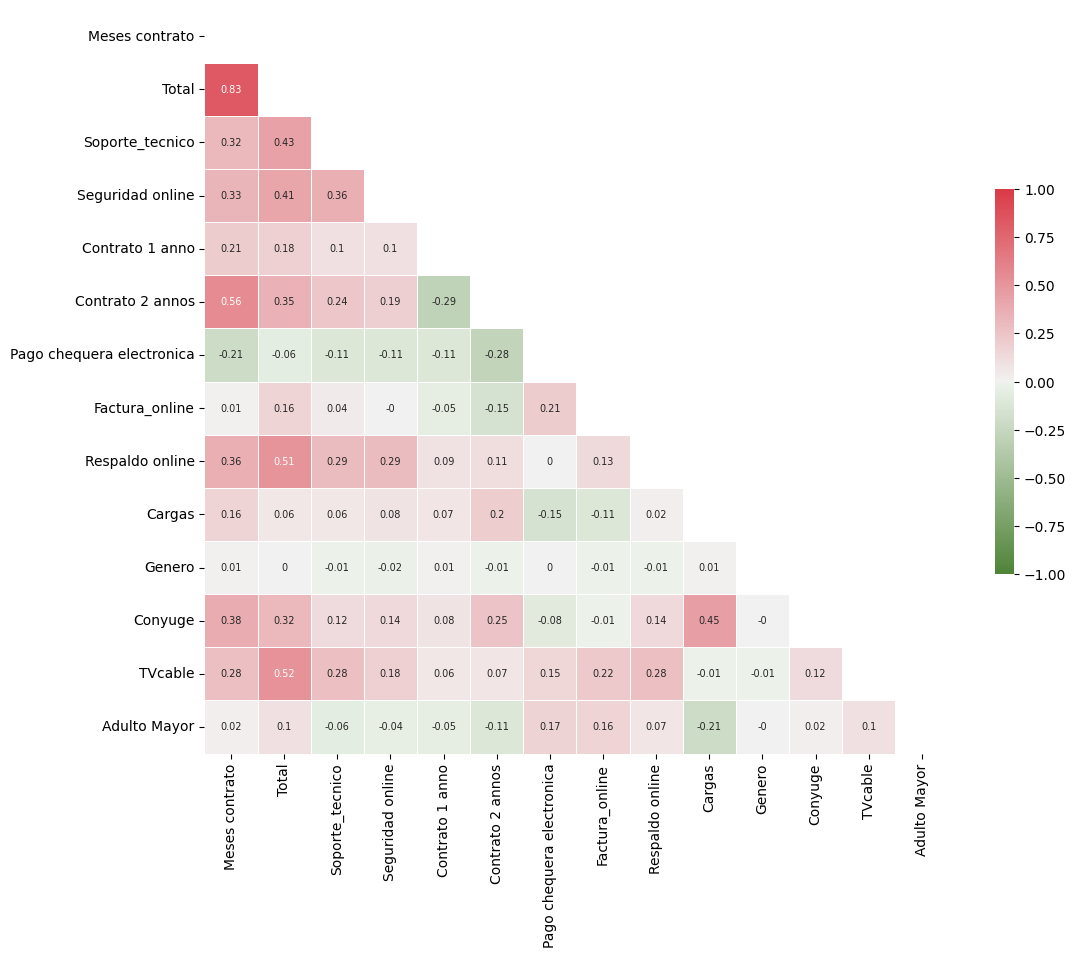

In [120]:
datos_ch_corr=X_selected_feautures.corr().round(2)
datos_ch_corr

# Generar una máscara para el triángulo superior
mascara = np.zeros_like(datos_ch_corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(12,10))

# Generar el mapa de calor (heatmap)
cmap = sns.diverging_palette(120, 10, as_cmap=True)

sns.heatmap(datos_ch_corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, annot_kws={'size': 7},cbar_kws={"shrink": .5})

# Ajustar tamaño de las etiquetas de los ejes
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Mostrar el mapa de calor (heatmap)
plt.show()

In [121]:
#Correlación con la Evasión
datos_ch_evasion=datos_ch.corr()['Evasion'].sort_values(ascending=False)
datos_ch_evasion

,Evasion
Evasion,1.000000
Pago chequera electronica,0.294181
Factura_online,0.186309
Adulto Mayor,0.146400
TVcable,0.062456
Genero,-0.009494
Respaldo online,-0.080211
Conyuge,-0.148106
Cargas,-0.160347
Soporte_tecnico,-0.160476


##Guardando el modelo para reutilizar

In [122]:
import pickle

try:
  with open('modelo_champion.pkl','wb') as file:
    pickle.dump(modelo_champion,file)
  print('Modelo serializado con éxito')
except Exception as e:
  print('Se presentó un error al almacenar el modelo: ',str(e))


Modelo serializado con éxito
